In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
import math
%matplotlib inline

In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
#basic transformation
def transformData(dataSet):
    latceil = math.ceil(np.mean(dataSet.latitude) + 2*np.std(dataSet.latitude))
    latfloor = math.floor(np.mean(dataSet.latitude) - 2*np.std(dataSet.latitude))
    longceil = math.ceil(np.mean(train.longitude) + 2*np.std(train.longitude))
    longfloor = math.floor(np.mean(train.longitude) - 2*np.std(train.longitude))
    dataSet['num_features'] = dataSet['features'].str.len()
    dataSet['num_words_desc'] = dataSet['description'].str.split().str.len()
    dataSet["num_photos"] = dataSet["photos"].apply(len)
    dataSet["created"] = pd.to_datetime(dataSet["created"])
    dataSet["created_year"] = dataSet["created"].dt.year
    dataSet["created_month"] = dataSet["created"].dt.month
    dataSet["created_day"] = dataSet["created"].dt.day
    dataSet["created_hour"] = dataSet["created"].dt.hour
    missingCoords = dataSet[(dataSet.longitude > longceil) | (dataSet.longitude < longfloor) | (dataSet.latitude > latceil) | (dataSet.latitude < latfloor)]
    missingGeoms = (missingCoords.street_address + ' New York').apply(geocoder.google)
    dataSet.loc[(dataSet.longitude > longceil) | (dataSet.longitude < longfloor) | (dataSet.latitude > latceil) | (dataSet.latitude < latfloor), \
                'latitude'] = missingGeoms.apply(lambda x: x.lat)
    dataSet.loc[(dataSet.longitude > longceil) | (dataSet.longitude < longfloor) | (dataSet.latitude > latceil) | (dataSet.latitude < latfloor), \
                'longitude'] = missingGeoms.apply(lambda x: x.lng)
    dataSet['bedbath_ratio'] = dataSet['bedrooms']/dataSet['bathrooms']
    dataSet.loc[dataSet.bathrooms == 0, 'bedbath_ratio'] = dataSet.loc[dataSet.bathrooms ==0, 'bedrooms']
    dataSet.loc[dataSet.bedbath_ratio == 0, 'bedbath_ratio'] = dataSet.loc[dataSet.bedbath_ratio ==0, 'bedbath_ratio'] + 1
#     bedbath_ratio set to number of bedrooms; when num bedroom == 0=> bedbath_ratio = 1
#     categorize bed and bath?
#     dataSet['bath_cat'] = [str(x) if x > 4 else str(x) for x in dataSet.bathrooms.apply(round).map(int)]
#     dataSet['bed_cat'] = [str(x) if x > 4 else str(x) for x in dataSet.bedrooms]
newcols = ['num_features','num_words_desc', "num_photos", "created_year", "created_month", "created_day", "created_hour", 'bedbath_ratio'] 
    #'bed_cat', 'bath_cat'

In [4]:
transformData(train)
transformData(test)

In [5]:
numericalcolumns = list(train.select_dtypes(include=[np.number]))
train['low_int'] = (train['interest_level'] == 'low').astype(int)
train['med_int'] = (train['interest_level'] == 'medium').astype(int)
train['high_int'] = (train['interest_level'] == 'high').astype(int)
def corrtable(x):
    a = []
    for i in numericalcolumns:
        b = kendalltau(train[x + '_int'],train[i])
        a.append([i, b[0], b[1]])
    a = pd.DataFrame(a)
    a.columns = ['columns', 'correlation', 'pvalue']
    a = a[a['pvalue'] <0.05]
    return a

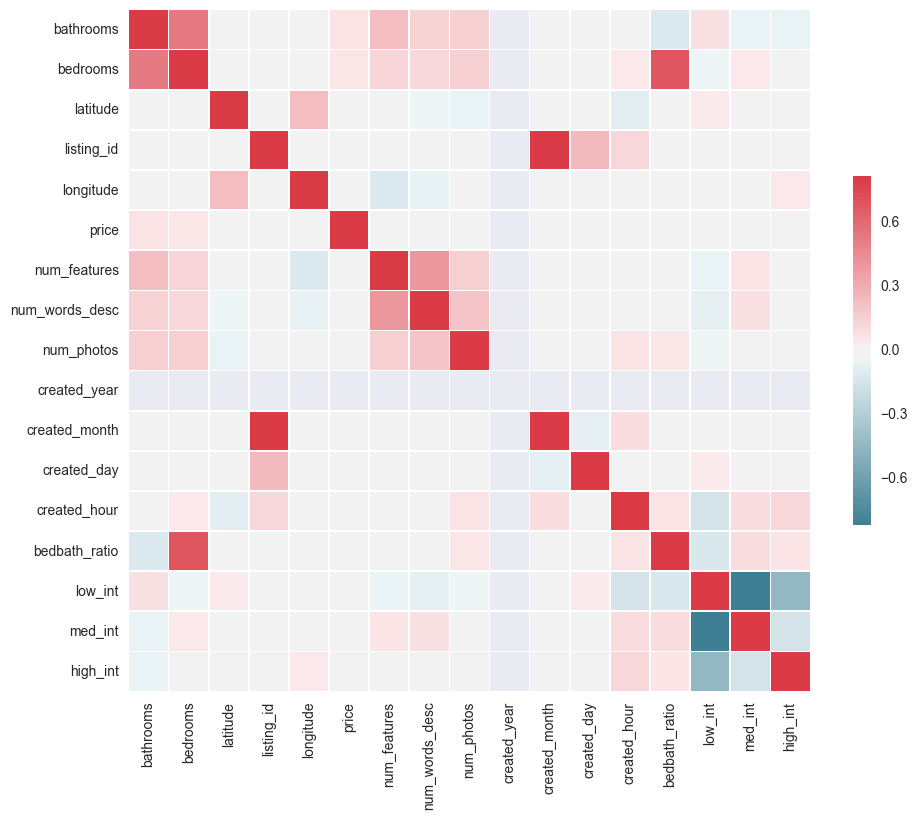

In [10]:
corr = train.select_dtypes(include=[np.number]).corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, #mask = mask
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [8]:
train.select_dtypes(include=[np.number])

,bathrooms,bedrooms,latitude,listing_id,longitude,price
10,1.5,3,40.7145,7211212,-73.9425,3000
10000,1.0,2,40.7947,7150865,-73.9667,5465
100004,1.0,1,40.7388,6887163,-74.0018,2850
100007,1.0,1,40.7539,6888711,-73.9677,3275
100013,1.0,4,40.8241,6934781,-73.9493,3350
100014,2.0,4,40.7429,6894514,-74.0028,7995
100016,1.0,2,40.8012,6930771,-73.9660,3600
100020,2.0,1,40.7427,6867392,-73.9957,5645
100026,1.0,1,40.8234,6898799,-73.9457,1725
100027,2.0,4,40.7278,6814332,-73.9808,5800
